## New Things that I have learned here:
1. df = df.reset_index()
2. f"\033[1;{color}mThe comment is: {df['Comment'][i]}]
3. stratify=df['num_emotion'] //The stratify parameter is used in train-test splitting to ensure that the class distribution in the training and testing sets is similar to the original dataset. 
4. display_labels=label_names.keys() // The keys() method is used to retrieve the keys from a dictionary

In [ ]:
5. table = PrettyTable(["Class", "Precision", "Recall", "F1-score", "Support"])

for class_name, metrics in report.items():
    if isinstance(metrics, dict):
        row = [class_name, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']]
        table.add_row(row)

6. grid_search = GridSearchCV(svc, param_grid, cv=10)
7. best_params = grid_search.best_params_ // grid_search.best_params_ will output the best combination of parameters found during the grid search.
grid_search.best_score_ will output the best score achieved with those parameters.

## Problems I encountered during the implementation:
1. Some code lines are not complete like 
plt.pie(percentages, labels=df['Emotion'].unique(), colors=['#98FB98', '#ADD8E6', 'LightGrey', '#DAA520'], autopct='%1.1f%%')
was not complete.
2. Dependency errors: Like before : "nlp = spacy.load('en_core_web_sm')"
you have to process : "!python -m spacy download en_core_web_sm"

## Let's Start!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('training.csv', header = None)
validation = pd.read_csv('validation.csv', header = None)

In [3]:
train.columns = ["Tweet ID", "Entity", "Sentiment", "Tweet Content"]
validation.columns = ["Tweet ID", "Entity", "Sentiment", "Tweet Content"]

train = train.sample(10000)

In [4]:
df = train[['Tweet Content', 'Sentiment']]
df = df.rename(columns={'Tweet Content' : 'Comment', 'Sentiment' : 'Emotion'})
df.head()

,Comment,Emotion
34540,i'm feeling sick as an tired of fortnite doing...,Negative
58659,"Facebook, Twitter to Disclose Identity of Fake...",Negative
72336,shoutout to duellll and turbo for the gifted s...,Positive
74247,Amazing work @NVIDIAAI for. (H/T @pwnallthethi...,Positive
59275,I'm banned for 3 days (Facebook) & & & I'm now...,Irrelevant


In [5]:
df = df.dropna(subset=['Comment'])
df = df.reset_index()
df = df.drop('index', axis=1)
df.head()

,Comment,Emotion
0,i'm feeling sick as an tired of fortnite doing...,Negative
1,"Facebook, Twitter to Disclose Identity of Fake...",Negative
2,shoutout to duellll and turbo for the gifted s...,Positive
3,Amazing work @NVIDIAAI for. (H/T @pwnallthethi...,Positive
4,I'm banned for 3 days (Facebook) & & & I'm now...,Irrelevant


In [6]:
df['Emotion'].value_counts()

Emotion
Negative      3010
Positive      2737
Neutral       2476
Irrelevant    1679
Name: count, dtype: int64

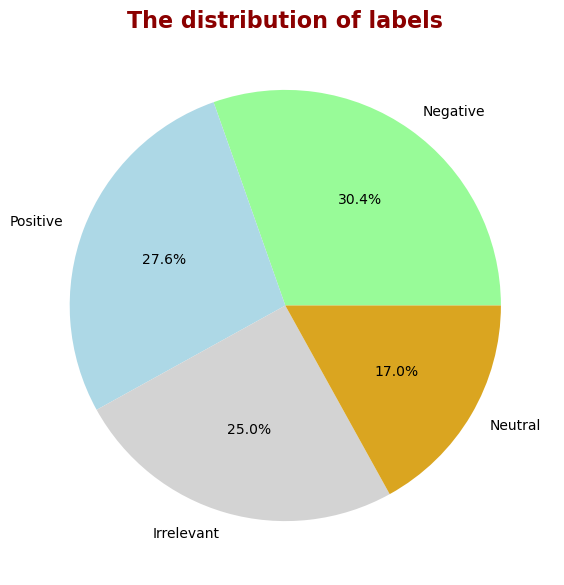

In [8]:
percentages = (df['Emotion'].value_counts() / df['Emotion'].count()) * 100

# Configure plot
plt.figure(figsize=(7,7))
plt.pie(percentages, labels=df['Emotion'].unique(), colors=['#98FB98', '#ADD8E6', 'LightGrey', '#DAA520'], autopct='%1.1f%%')
plt.title('The distribution of labels', color='#8B0000', fontsize=16, fontweight='bold')
plt.show()

In [11]:
import random

#ANSI color codes
color_codes = {
    "blue" : 34,
    "green" : 32,
    "red" : 31,
    "yellow" : 33,
    "purple" : 35,
    "cyan" : 36,
    "gray" : 37,
    "pink" : 35
}

for i in range(0, len(df), 7):
    color = random.choice(list(color_codes.values()))
    print(f"\033[1;{color}mThe comment is: {df['Comment'][i]}\033[0m\n\033[1;{color}mIts label is: {df['Emotion'][i]}\033[0m")
    if i > 30:
        break

The comment is: i'm feeling sick as an tired of fortnite doing collabs based off on your mom because it is getting to exactly the point where it't s so very unoriginal
Its label is: Negative
The comment is: This card is great.
Its label is: Positive
The comment is: @CosplayFhey is streaming CS:GO! Come hang and have a good laugh!
Its label is: Neutral
The comment is: Johnson & Reed confirm trial of COVID-19 compound after negative immune response in primates marketwatch.com/story/johnson-...
Its label is: Neutral
The comment is: Baby, not j & j.
Its label is: Negative
The comment is: I'm very excited about upgrading to the Xbox Series X in a couple of years. Not to say that the PS5 won't be great - it should and Sony can use things like Backward compatibility to get games from the PS1 to the PS4 and perhaps even the PS5 and Vita on the console.
Its label is: Positive


# Preprocessing

In [14]:
import spacy

# Download the model
# !python -m spacy download en_core_web_sm

# Load the model
nlp = spacy.load('en_core_web_sm')

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.1 MB/s eta 0:00:06
     ---------- ----------------------------- 3.4/12.8 MB 8.4 MB/s eta 0:00:02
     -------------------- ------------------- 6.6/12.8 MB 12.6 MB/s eta 0:00:01
     ------------------------------- ------- 10.2/12.8 MB 12.8 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 12.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 12.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
doc = df['Comment'][1000]
doc

'I miss watching.'

# Tokenization

In [16]:
txt = nlp(doc)
txt

I miss watching.

In [17]:
for token in txt:
    print(token)

I
miss
watching
.


# Stemming and Lemmatization

In [18]:
for token in txt:
    print(f"Word: {token} -> {token.lemma_}")

Word: I -> I
Word: miss -> miss
Word: watching -> watch
Word: . -> .


In [19]:
for token in txt:
    if token.is_stop:
        print(token)

I


In [20]:
def processing(txt):
    preprocess_txt = []
    doc = nlp(txt)
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        preprocess_txt.append(token.lemma_)
    return " ".join(preprocess_txt)

print(doc)
process_doc = processing(doc)
print("\n", process_doc)

I miss watching.

 miss watch


In [46]:
df['preprocess_comment'] = df['Comment'].apply(processing) # actual implementation of the above defined function;preprocessing

In [22]:
df['num_emotion'] = df['Emotion'].map({'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3})
df.head()

,Comment,Emotion,preprocess_comment,num_emotion
0,i'm feeling sick as an tired of fortnite doing...,Negative,feel sick tired fortnite collab base mom get e...,0
1,"Facebook, Twitter to Disclose Identity of Fake...",Negative,Facebook Twitter disclose identity Fake Accoun...,0
2,shoutout to duellll and turbo for the gifted s...,Positive,shoutout duellll turbo gifted sub today y’ INS...,1
3,Amazing work @NVIDIAAI for. (H/T @pwnallthethi...,Positive,amazing work @NVIDIAAI H T @pwnallthethings,1
4,I'm banned for 3 days (Facebook) & & & I'm now...,Irrelevant,ban 3 day Facebook wait 16 hour nalang para ma...,3


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['preprocess_comment'], df['num_emotion'], test_size=0.2, random_state=42, stratify=df['num_emotion'])

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF = TfidfVectorizer()
x_train_tf = TF.fit_transform(x_train)
x_test_tf = TF.transform(x_test)

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train_tf, y_train)

y_pred = rf.predict(x_test_tf)

# Evaluation

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))

0.6385663806158506


In [28]:
print(confusion_matrix(y_test, y_pred))

[[456  75  56  15]
 [ 86 383  69  10]
 [ 88  79 310  18]
 [ 78  79  63 116]]


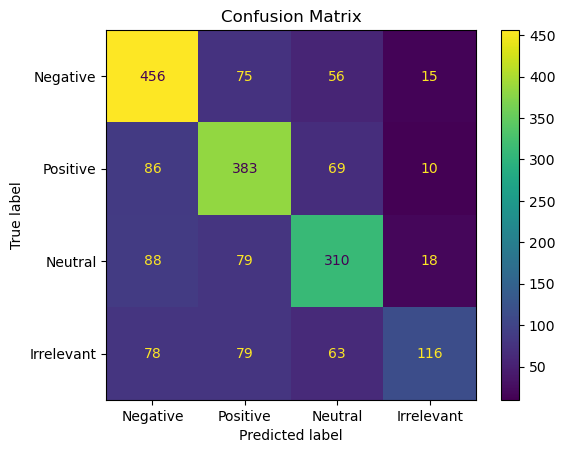

In [29]:
label_names = {'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3}
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_names.keys())

#cm_display.plot(cmap='Blues'), xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import classification_report
label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}
report = classification_report(y_test, y_pred, target_names=label_names.keys())
print(report)

              precision    recall  f1-score   support

    Negative       0.64      0.76      0.70       602
    Positive       0.62      0.70      0.66       548
     Neutral       0.62      0.63      0.62       495
  Irrelevant       0.73      0.35      0.47       336

    accuracy                           0.64      1981
   macro avg       0.65      0.61      0.61      1981
weighted avg       0.65      0.64      0.63      1981



In [33]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable

label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}
report = classification_report(y_test, y_pred, target_names=label_names.keys(), output_dict=True)
table = PrettyTable(["Class", "Precision", "Recall", "F1-score", "Support"])

for class_name, metrics in report.items():
    if isinstance(metrics, dict):
        row = [class_name, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']]
        table.add_row(row)

print(table.get_string(style="BLUE"))

+--------------+--------------------+---------------------+--------------------+---------+
|    Class     |     Precision      |        Recall       |      F1-score      | Support |
+--------------+--------------------+---------------------+--------------------+---------+
|   Negative   | 0.6440677966101694 |  0.7574750830564784 | 0.6961832061068702 |  602.0  |
|   Positive   | 0.6217532467532467 |  0.698905109489051  | 0.6580756013745704 |  548.0  |
|   Neutral    | 0.6224899598393574 |  0.6262626262626263 | 0.6243705941591138 |  495.0  |
|  Irrelevant  | 0.7295597484276729 | 0.34523809523809523 | 0.4686868686868687 |  336.0  |
|  macro avg   | 0.6544676879076117 |  0.6069702285115628 | 0.6118290675818557 |  1981.0 |
| weighted avg | 0.647003633706351  |  0.6385663806158506 | 0.6291115353948257 |  1981.0 |
+--------------+--------------------+---------------------+--------------------+---------+


# SVM with GridSearchCV

In [34]:
X = df['preprocess_comment']
y = df['Emotion']

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 3, ..., 3, 2, 2], dtype=int64)

In [40]:
from sklearn.svm import SVC

param_grid = {'kernel':['rbf'],
              'C':[0.1, 1, 10, 15],
              'random_state':[42]}
svc = SVC()

In [41]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 15], 'kernel': ['rbf'],
                         'random_state': [42]})

In [42]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
print(f"Best model Accuracy Score is :{grid_search.best_score_}")

Best hyperparameters: {'C': 10, 'kernel': 'rbf', 'random_state': 42}
Best model Accuracy Score is :0.7005633530053308


In [44]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
y_pred

array([1, 1, 3, ..., 3, 2, 2], dtype=int64)

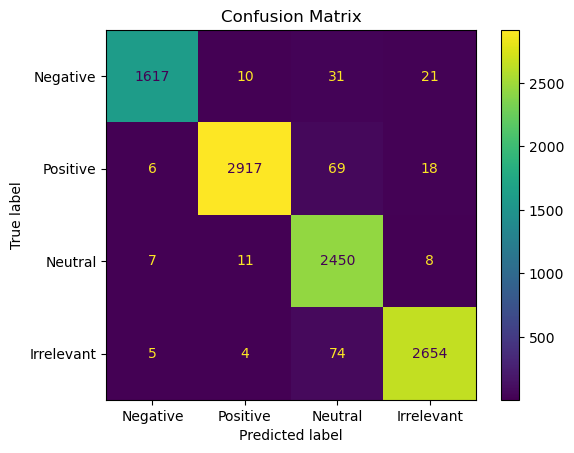

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

label_names = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}

cm_display = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=label_names.keys())

plt.title('Confusion Matrix')
plt.show()